# Video Game Sales Analysis Project – Ice Store

# Content <a id='back'></a>

* [Introduction](#intro)
* [1. Initialisation](#ini)
* [2. Upload Data](#uploaddata)
* [3. Exploratory Data Analysis](#eda)
  * [3.1 Conclusion and Following Steps](#stat)
* [4. Data Preprocesing](#preprocesing)
  * [4.1 Fixing Anomalies and Data Types](#fix1)
  * [4.2 Enhancing Data Base](#fix2)
  * [4.3 Fixing Missing Values](#fix3)
* [5. Analysing Data and Visualization](#analysis)
    * [5.1 Analysis of games released over time](#analysis1)
    * [5.2 Analysis of sales by platform and years](#analysis2)
    * [5.3 Analysis of platform sales leaders](#analysis3)
    * [5.4 Analysis of global game sales by platform](#analysis4)
    * [5.5 Analysis of reviews versus sales of the Wii platform](#analysis5)
    * [5.6 Analysis of the same games on multiple platforms](#analysis6)
    * [5.7 5.7 Global sales analysis by gender](#analysis7)
* [6. Analysis per Region](#region)
    * [6.1 Analysis of 5 main platforms](#region1)
    * [6.2 Analysis of 5 main genres](#region2)
    * [6.3 Analysis of sales by ESRB ratings](#region3)
* [7. Testing statistical hypotheses](#test)
    * [7.1 Analysis of Average User Ratings for Xbox One and PC](#test1)
    * [7.2 Analysis of Average User Ratings for Action and Sports](#test2)
* [Project Conclusion](#end)

## Introduction <a id='intro'></a>

As an analyst at Ice, a global online store specializing in video games, this project focuses on leveraging user and expert reviews, game genres, platforms, and historical sales data to identify patterns that determine a game’s success. The primary goal is to pinpoint promising projects and strategically plan advertising campaigns based on these insights.

The dataset includes historical data up to December 2016, positioning this analysis within the context of preparing for the 2017 marketing campaign. However, the objective extends beyond a single year’s campaign planning; it emphasizes gaining proficiency in data analysis techniques that can be applied regardless of the year of prediction. Additionally, the dataset features an “ESRB rating” column, which reflects the Entertainment Software Rating Board’s classification of game content, providing further variables for the comprehensive evaluation of game performance.

## 1. Initialisation <a id='ini'></a>

In [1]:
# Loading the libraries
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 2. Upload Data <a id='uploaddata'></a>

In [2]:
# Uploading all the datasets 
try: 
    games = pd.read_csv('/datasets/games.csv')
    
except:
    games = pd.read_csv('/datasets/games.csv')
    

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b>Buen trabajo con la carga de datos y librerias.</div>

## 3. Exploratory Data Analysis (EDA) <a id='eda'><a>

In [3]:
#We proceed to load the database of video games to be analysed.
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Exploring the dataset

The dataset contains the following fields:

- `Name`: Game name
- `Platform`: Game console
- `Year_of_Release`: Game year of release
- `Genre`: Male, Female 
- `NA_sales`: North American sales in millions of US dollars) 
- `EU_sales`: European sales in millions of US dollars) 
- `JP_sales`: sales in Japan in millions of US dollars) 
- `Other_sales`: sales in other countries in million USD) 
- `Critic_Score`: critic score, maximum of 100
- `User_Score`: users score, maximum of 10 
- `Rating`:Entertainment Software Rating Board (ESRB) score

In [4]:
# Printing the general information of the dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


In [5]:
#Verifying details of each data variables
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games[games['Name']== 'FIFA 14'] #printing a sample

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E
271,FIFA 14,X360,2013.0,Sports,0.92,2.89,0.01,0.40,84.0,4.2,E
469,FIFA 14,PS4,2013.0,Sports,0.61,1.85,0.11,0.44,87.0,6.3,E
1753,FIFA 14,XOne,2013.0,Sports,0.41,0.66,0.00,0.09,88.0,5.8,E
4699,FIFA 14,PSV,2013.0,Sports,0.08,0.23,0.01,0.09,NaN,1.8,E
4809,FIFA 14,PC,2013.0,Sports,0.01,0.36,0.00,0.03,87.0,4.6,E
4985,FIFA 14,Wii,2013.0,Sports,0.00,0.36,0.00,0.02,NaN,4.3,E
6871,FIFA 14,3DS,2013.0,Sports,0.00,0.22,0.00,0.01,NaN,NaN,NaN
7875,FIFA 14,PSP,2013.0,Sports,0.00,0.15,0.00,0.04,NaN,3.4,E


In [5]:
games.isna() #Checking missing values

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
16710,False,False,False,False,False,False,False,False,True,True,True
16711,False,False,False,False,False,False,False,False,True,True,True
16712,False,False,False,False,False,False,False,False,True,True,True
16713,False,False,False,False,False,False,False,False,True,True,True


In [7]:
duplicados = games.duplicated()
cantidad_duplicados = duplicados.sum()
print(cantidad_duplicados) # Finally, we check the number of duplicate rows in 'games'.

0

At a glance with the above information, we can previously observe that:

- There are a total of 16715 rows.
- There are variables with missing values (‘Name’,‘Year_of_realese’,‘genre’,‘critic_score’, ‘user_score’ and ‘rating’).
- The field titles must be standardised in lowercase letters.
- It appears that sales in NA, EU, JP and other countries have zero values. It will be necessary to analyse each case in depth. The other variables do not have anomalous values.
- The variable ‘year_of_realease’ should be in ‘int’ format and the variable ‘user_score’ in ‘float64’ format. This will be corrected after correcting the missing values, as the column data cannot be transformed as long as it has ‘nan’ values.
- No duplicate data is visible.

We will continue to dig deeper into the analysis on each of the variables to see if further adjustments will be required.

In [8]:
#Verifying unique values of 'name' 
games['Name'].sort_values(ascending=True).unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'wwe Smackdown vs. Raw 2006', '¡Shin Chan Flipa en colores!',
       nan], dtype=object)

In [9]:
#Verifying unique values of 'platform' 
games['Platform'].sort_values(ascending=True).unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [10]:
games['Platform'].value_counts() #We check the quantity of each one to see if there are any anomalies.

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [11]:
games['Year_of_Release'].sort_values(ascending=True).unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [12]:
games['Genre'].sort_values(ascending=True).unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

In [13]:
games['Critic_Score'].sort_values(ascending=True).unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [14]:
games['User_Score'].sort_values(ascending=True).unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [15]:
#Verificamos el % de valores tbd en 'User_score'
num_filas = games.shape[0]
fila_tbd = (games['User_Score']=='tbd').sum() 
prop_tbd = fila_tbd / num_filas *100 #porcentaje de valores con 'tbd'
prop_tbd

14.501944361352079

In [16]:
#We check the % of missing values in 'User_score'
num_filas = games.shape[0]
fila_null = games['User_Score'].isnull().sum() 
prop_null = fila_null / num_filas *100 #porcentaje de valores con ausentes
prop_null

40.08973975471134

In [17]:
games['Rating'].sort_values(ascending=True).unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Reviewing each of the columns, we see that no text homologation is required in the values of each variable, except in the variable ‘user_score’ where we see the abbreviation ‘tbd’ which corresponds to 14% of the total data. In addition, it was corroborated that the percentage of ‘nan’ values is 40%, so it will be better to consider that 14% as missing values as well, since the order of values with no score is already very high.

We will now proceed to correct each of the situations identified before correcting the missing values:

## 4. Data Preprocesing <a id='preprocesing'></a>

### Fixing variables text

In [18]:
#We correct texts in lowercase columns
games.columns = games.columns.str.lower()

### 4.1 Fixing Anomalies and Data Types <a id='fix1'></a>

In [19]:
#We transform the 'tbd' values to 'nan' so that they can be treated as missing values entirely.
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [20]:
games['user_score'].sort_values().unique() #Checking the changes

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

In [21]:
#We change the variable 'user_score' to type 'float'
games['user_score'] = games['user_score'].astype(float)

In [22]:
games.info() #Checking the changes

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16713 non-null  object 
, 1   platform         16715 non-null  object 
, 2   year_of_release  16446 non-null  float64
, 3   genre            16713 non-null  object 
, 4   na_sales         16715 non-null  float64
, 5   eu_sales         16715 non-null  float64
, 6   jp_sales         16715 non-null  float64
, 7   other_sales      16715 non-null  float64
, 8   critic_score     8137 non-null   float64
, 9   user_score       7590 non-null   float64
, 10  rating           9949 non-null   object 
,dtypes: float64(7), object(4)
,memory usage: 1.4+ MB


In [23]:
# We check the number of zero values in the 'na_sales' column 

valor_total = games['na_sales'].value_counts().sum()
filtro = games['na_sales']==0
porcentaje = (filtro.sum()/valor_total)*100

print(f"Porcentaje: {porcentaje:.2f}%")

Porcentaje: 26.97%


In [24]:
# We check the number of zero values in the 'eu_sales' column 

valor_total = games['eu_sales'].value_counts().sum()
filtro = games['eu_sales']==0
porcentaje = (filtro.sum()/valor_total)*100

print(f"Porcentaje: {porcentaje:.2f}%")

Porcentaje: 35.12%


In [25]:
# We check the number of zero values in the 'jp_sales' column 


valor_total = games['jp_sales'].value_counts().sum()
filtro = games['jp_sales']==0
porcentaje = (filtro.sum()/valor_total)*100

print(f"Porcentaje: {porcentaje:.2f}%")

Porcentaje: 62.90%


In [26]:
# We check the number of zero values in the 'other_sales' column 


valor_total = games['other_sales'].value_counts().sum()
filtro = games['other_sales']==0
porcentaje = (filtro.sum()/valor_total)*100

print(f"Porcentaje: {porcentaje:.2f}%")

Porcentaje: 39.49%


We can see that the zero sales values are quite a high percentage of the total data, so we will assume that the data is correct, where there were 0 sales values for those regions of the world for certain types of games. 

We will now proceed to create a total sales column, as we confirm the sales values for each region:

## 4.2 Enhancing Dataset <a id='fix2'></a>

In [27]:
# Creating a new column of total sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

## 4.3 Fixing Missing Values <a id='fix3'></a>

In [28]:
games.info() #Recalling the variables to be addressed

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16713 non-null  object 
, 1   platform         16715 non-null  object 
, 2   year_of_release  16446 non-null  float64
, 3   genre            16713 non-null  object 
, 4   na_sales         16715 non-null  float64
, 5   eu_sales         16715 non-null  float64
, 6   jp_sales         16715 non-null  float64
, 7   other_sales      16715 non-null  float64
, 8   critic_score     8137 non-null   float64
, 9   user_score       7590 non-null   float64
, 10  rating           9949 non-null   object 
, 11  total_sales      16715 non-null  float64
,dtypes: float64(8), object(4)
,memory usage: 1.5+ MB


In [29]:
#We fill the missing values of 'name' in an 'unknown' category.
games['name'].fillna('unknown', inplace=True)

In [30]:
# We check the % of missing values for 'year_of_release'
num_filas = games.shape[0]
fila_ausentes = games['year_of_release'].isnull().sum() 
prop_ausentes = fila_ausentes / num_filas *100 
prop_ausentes

1.609332934489979

There is 1.6% of missing values in the total of the "year_of_release" column, which means that the data could be replaced using the "Simple Imputation" method, that is, replacing the missing values with the median or mean.

Next, we will check which mean or median will be the most convenient to use by comparing the column with another candidate variable that might be correlated with it, but first, we will see if this variable has a pattern in its missing values compared to another candidate variable that explains it.

In [31]:
datos_ausentes = games[games['year_of_release'].isnull()]
datos_no_ausentes = games[games['year_of_release'].notnull()]
cantidad_datos_ausentes = datos_ausentes['platform'].value_counts(normalize = True)
cantidad_datos_no_ausentes = datos_no_ausentes['platform'].value_counts(normalize =True)

tabla_contingencia1 = pd.DataFrame({'No Ausente': cantidad_datos_no_ausentes, 'Ausente': cantidad_datos_ausentes})
tabla_contingencia1 = tabla_contingencia1.sort_values(by=['Ausente', 'No Ausente'], ascending=[False, False])

tabla_contingencia1 # Let's investigate missing values on another potential causative characteristic (‘platform’).

,No Ausente,Ausente
PS2,0.129332,0.126394
Wii,0.078195,0.126394
DS,0.128968,0.111524
X360,0.074912,0.111524
PS3,0.079411,0.092937
XB,0.048826,0.078067
PC,0.058190,0.063197
2600,0.007053,0.063197
PSP,0.072540,0.059480
GC,0.032956,0.052045


We can see that the missing values in the “year_of_release” column do not show a clear pattern with respect to the main candidate “platform” for determining whether there is any explanation or symmetrical distribution of the missing values. In other words, there is no clear trend in how missing values are distributed across any “platform” category (the maximum value is 0.12, which is below the general threshold of 0.7 or 0.8). This implies that there is no need to investigate further for a possible correlation-based explanation of these missing values, as they can be considered random from a statistical perspective. Therefore, the missing values in “year_of_release” can be replaced with either the median or mean.

In [32]:
#We added a function to calculate means and medians to complete the missing values.
def calcular_estadistica_por_grupo(data, columna, columna2, estadistica = True, redondear = True):
    if estadistica == True:
        resultado = data.groupby(columna2)[columna].mean()
        if redondear:
                resultado = round(resultado)
    else:
        resultado = data.groupby(columna2)[columna].median()
    
    resultado = resultado.sort_values(ascending=False)
    return resultado

In [33]:
games_notna = games.dropna()

In [34]:
#We calculate the average of 'year_of_release' grouped by platform 
calcular_estadistica_por_grupo(games_notna,'year_of_release','platform',True,True)

platform
XOne    2015.0
PS4     2015.0
WiiU    2014.0
PSV     2013.0
3DS     2013.0
PS3     2010.0
PC      2009.0
X360    2009.0
Wii     2008.0
PSP     2007.0
DS      2007.0
PS2     2004.0
XB      2004.0
GC      2003.0
GBA     2003.0
DC      2000.0
PS      1999.0
Name: year_of_release, dtype: float64

In [203]:
#We calculate the median of 'year_of_release' grouped by platform 
calcular_estadistica_por_grupo(games_notna,'year_of_release','platform',False,True)

platform
XOne    2015.0
PS4     2015.0
WiiU    2013.0
PSV     2013.0
3DS     2012.0
PS3     2010.0
PC      2009.0
X360    2009.0
Wii     2008.0
PSP     2007.0
DS      2007.0
PS2     2004.0
XB      2004.0
GC      2003.0
GBA     2003.0
PS      2000.0
DC      2000.0
Name: year_of_release, dtype: float64

We see that the first platforms are the same for the mean and median of release years, and the deviation is at most 1 year when comparing their median and mean, so the best indicator will be the mean to replace their missing values:

In [204]:
for platform, media in calcular_estadistica_por_grupo(games, 'year_of_release', 'platform',True, True).iteritems(): #Creamos una función para reemplazar los valores ausentes.
    games.loc[(games['platform'] == platform) & (games['year_of_release'].isnull()), 'year_of_release'] = media # Reemplazar los valores ausentes (completando con la variable más representativa que el tipo de plataforma de juego)

In [205]:
games['year_of_release'].unique() #Verifying missing values replace

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [206]:
#We review how the 'nan' values of 'genre' behave
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


We see that the 'nan' values in 'genre' (2 cases) match the 'unknown' names in 'name', so we will replace the 'nan' values with the 'unknown' category as well.

In [207]:
#We fill in the missing values of 'name' in an 'unknown' category 
games['genre'].fillna('unknown', inplace=True)

Now we proceed to fill in missing values of 'critic_score'.

In [208]:
# We check the % of missing values in 'critic_score' 
num_filas = games.shape[0]
fila_ausentes1 = games['critic_score'].isnull().sum() 
prop_ausentes1 = fila_ausentes1 / num_filas *100 
prop_ausentes1

51.31917439425665

The percentage of missing values is 51%, but in this case we will apply the assumption that we can replace them by the ‘simple imputation’ method.

Next, we will check which mean or median will be the most convenient to use by comparing the column with some other candidate variable to be correlated with it, but first we will see if there is a pattern in its missing values compared to some candidate variable that explains it:

In [209]:
datos_ausentes = games[games['critic_score'].isnull()]
datos_no_ausentes = games[games['critic_score'].notnull()]
cantidad_datos_ausentes = datos_ausentes['user_score'].value_counts(normalize = True)
cantidad_datos_no_ausentes = datos_no_ausentes['user_score'].value_counts(normalize =True)

tabla_contingencia1 = pd.DataFrame({'No Ausente': cantidad_datos_no_ausentes, 'Ausente': cantidad_datos_ausentes})
tabla_contingencia1 = tabla_contingencia1.sort_values(by=['Ausente', 'No Ausente'], ascending=[False, False])

tabla_contingencia1 # Let's investigate the missing values on another potential causal feature ('user_score')

,No Ausente,Ausente
7.8,0.042468,0.045375
7.0,0.027932,0.041885
8.0,0.038050,0.040140
7.6,0.028645,0.033159
8.3,0.033633,0.031414
...,...,...
1.0,0.000285,NaN
1.5,0.000285,NaN
1.9,0.000285,NaN
2.3,0.000285,NaN


It can be seen that there is no clear explanation that the missing values of the column ‘critic_score’ have a clear pattern with respect to the main candidate ‘user_score’ to see if there is any symmetry in its missing values.

We will now proceed to group the variable ‘user_score’ into categories to better work on filling in the missing values of ‘critic_score’ as it is the candidate variable that could best explain that score.

In [210]:
# We create a function to classify into different numerical groups based on 'user_score' ranges 
def categorizar_user_score(user):
    if  0<= user < 4:
        return 'low user rating'
    elif 4<= user <= 6:
        return 'mid user rating'
    else:
        return 'high user rating' 

In [211]:
#Create new category column of ‘user_score’.
games['cat_user_score'] = games['user_score'].apply(categorizar_user_score)

In [212]:
games_notna1 = games.dropna() #We create a dataframe without missing values. It will be useful for corrections later on.

In [213]:
#We calculate the average of 'critic_score' grouped by 'user_score' 
calcular_estadistica_por_grupo(games_notna1,'critic_score','cat_user_score',True,False)

cat_user_score
alta puntuación usuario     73.329314
media puntuación usuario    59.697876
baja puntuación usuario     46.948529
Name: critic_score, dtype: float64

In [214]:
#We calculate the median of 'critic_score' grouped by 'user_score' 
calcular_estadistica_por_grupo(games_notna1,'critic_score','cat_user_score',False,False)

cat_user_score
alta puntuación usuario     75.0
media puntuación usuario    59.0
baja puntuación usuario     45.0
Name: critic_score, dtype: float64

There is clearly a trend that the higher the user's score category, the higher the 'critic_score', which makes sense. Now, we will use the mean since there is practically no deviation in the data and in that sense, the mean is more representative.

In [215]:
#We create a function to replace the missing values. 
for cat_user, media in calcular_estadistica_por_grupo(games_notna1, 'critic_score', 'cat_user_score',True, False).iteritems(): 
    games.loc[(games['cat_user_score'] == cat_user) & (games['critic_score'].isnull()), 'critic_score'] = media # Replace the missing values (filling in with the most representative variable, which is the user_score category)

In [216]:
games.info() #Verifying the changes

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 13 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16715 non-null  object 
, 1   platform         16715 non-null  object 
, 2   year_of_release  16715 non-null  float64
, 3   genre            16715 non-null  object 
, 4   na_sales         16715 non-null  float64
, 5   eu_sales         16715 non-null  float64
, 6   jp_sales         16715 non-null  float64
, 7   other_sales      16715 non-null  float64
, 8   critic_score     16715 non-null  float64
, 9   user_score       7590 non-null   float64
, 10  rating           9949 non-null   object 
, 11  total_sales      16715 non-null  float64
, 12  cat_user_score   16715 non-null  object 
,dtypes: float64(8), object(5)
,memory usage: 1.7+ MB


In [217]:
games.describe() #Verify changes in the mean and standard deviation of ‘critic_score’.

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,7590.000000,16715.000000
mean,2006.472270,0.263377,0.145060,0.077617,0.047342,70.991326,7.125046,0.533396
std,5.897158,0.813604,0.503339,0.308853,0.186731,10.136982,1.500006,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,70.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,73.329314,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,73.329314,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


We can observe that the new average is 70.99 compared to the 68.96 average before filling in the missing values, which indicates that there was not a significant deviation. We continue with the treatment of missing values for 'user_score'.

In [218]:
# We check the % of missing values in 'user_score'num_filas = games.shape[0]
fila_ausentes2 = games['user_score'].isnull().sum() 
prop_ausentes2 = fila_ausentes2 / num_filas *100 
prop_ausentes2

54.59168411606342

We see that the number of missing values is 54.59%, but in this case we will apply the assumption that we can replace them by the ‘Simple Imputation’ method.

Next, we will check which mean or median will be the most convenient to use by comparing the column with some other candidate variable to be correlated with it, but first we will see if there is a pattern in its missing values compared to some candidate variable that explains it:

In [219]:
datos_ausentes = games[games['user_score'].isnull()]
datos_no_ausentes = games[games['user_score'].notnull()]
cantidad_datos_ausentes = datos_ausentes['critic_score'].value_counts(normalize = True)
cantidad_datos_no_ausentes = datos_no_ausentes['critic_score'].value_counts(normalize =True)

tabla_contingencia2 = pd.DataFrame({'No Ausente': cantidad_datos_no_ausentes, 'Ausente': cantidad_datos_ausentes})
tabla_contingencia2 = tabla_contingencia2.sort_values(by=['Ausente', 'No Ausente'], ascending=[False, False])

tabla_contingencia2 # Let's investigate missing values on another potential causative characteristic (‘critic_score’)

,No Ausente,Ausente
73.329314,0.049802,0.877260
66.000000,0.020290,0.005370
68.000000,0.022661,0.005151
65.000000,0.019236,0.005041
62.000000,0.016733,0.004712
...,...,...
29.000000,0.000395,NaN
13.000000,0.000132,NaN
17.000000,0.000132,NaN
21.000000,0.000132,NaN


It can be observed that for the score values of 73.32, there is a high explanation for the missing values in 'user_score'. This is because we previously used this variable to fill in the missing values in 'critic_score'. Given this, we will continue using this variable, as it is also the only one that could potentially have a correlation with 'user_score'.

Next, we will use a variable that groups 'critic_score' into categories to avoid missing values when replacing the means/medians in 'user_score', just as we did in the previous exercise.

In [220]:
# We create a function to classify into different numerical groups based on 'critic_score' ranges
def categorizar_critic_score(critic):
    if  0<= critic < 34:
        return 'baja puntuación critic'
    elif 34<= critic <= 66:
        return 'media puntuación critic'
    else:
        return 'alta puntuación critic' 

In [221]:
#Creating a new category column
games['cat_critic_score'] = games['critic_score'].apply(categorizar_critic_score)# Crear una columna con categorías

In [222]:
games.info() #verifying the changes

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 14 columns):
, #   Column            Non-Null Count  Dtype  
,---  ------            --------------  -----  
, 0   name              16715 non-null  object 
, 1   platform          16715 non-null  object 
, 2   year_of_release   16715 non-null  float64
, 3   genre             16715 non-null  object 
, 4   na_sales          16715 non-null  float64
, 5   eu_sales          16715 non-null  float64
, 6   jp_sales          16715 non-null  float64
, 7   other_sales       16715 non-null  float64
, 8   critic_score      16715 non-null  float64
, 9   user_score        7590 non-null   float64
, 10  rating            9949 non-null   object 
, 11  total_sales       16715 non-null  float64
, 12  cat_user_score    16715 non-null  object 
, 13  cat_critic_score  16715 non-null  object 
,dtypes: float64(8), object(6)
,memory usage: 1.8+ MB


In [223]:
games_notna2 = games.dropna() #We create another new dataframe without missing values, since we created another column

In [224]:
#Calculating the 'user_score' average grouped by 'critic_score'
calcular_estadistica_por_grupo(games_notna2,'user_score','cat_critic_score',True,False)

cat_critic_score
alta puntuación critic     7.652961
media puntuación critic    6.205010
baja puntuación critic     3.800000
Name: user_score, dtype: float64

In [225]:
#Calculating the 'user_score' median grouped by 'critic_score'
calcular_estadistica_por_grupo(games_notna2,'user_score','cat_critic_score',False,False)

cat_critic_score
alta puntuación critic     7.8
media puntuación critic    6.4
baja puntuación critic     3.7
Name: user_score, dtype: float64

In general you see a trend where the higher the ‘critic_score’ category then the higher the ‘user_score’ score, which makes sense. Now, we will use the mean as there is practically no deviation in the data and in that sense, the mean is more representative.

In [226]:
#We create a function to replace the missing values
for cat_critic_score, media in calcular_estadistica_por_grupo(games_notna2, 'user_score', 'cat_critic_score',True, False).iteritems(): 
    games.loc[(games['cat_critic_score'] == cat_critic_score) & (games['user_score'].isnull()), 'user_score'] = media # Reemplazar los valores ausentes (completando con la variable más representativa que es la categoria de cat_critic_score)

In [227]:
games.info() #Verifying the changes

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 14 columns):
, #   Column            Non-Null Count  Dtype  
,---  ------            --------------  -----  
, 0   name              16715 non-null  object 
, 1   platform          16715 non-null  object 
, 2   year_of_release   16715 non-null  float64
, 3   genre             16715 non-null  object 
, 4   na_sales          16715 non-null  float64
, 5   eu_sales          16715 non-null  float64
, 6   jp_sales          16715 non-null  float64
, 7   other_sales       16715 non-null  float64
, 8   critic_score      16715 non-null  float64
, 9   user_score        16715 non-null  float64
, 10  rating            9949 non-null   object 
, 11  total_sales       16715 non-null  float64
, 12  cat_user_score    16715 non-null  object 
, 13  cat_critic_score  16715 non-null  object 
,dtypes: float64(8), object(6)
,memory usage: 1.8+ MB


In [228]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000
mean,2006.472270,0.263377,0.145060,0.077617,0.047342,70.991326,7.345915,0.533396
std,5.897158,0.813604,0.503339,0.308853,0.186731,10.136982,1.077412,1.548261
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,70.000000,7.300000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,73.329314,7.652961,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,73.329314,7.652961,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


We can see from the two previous tables that there are no longer any missing values for ‘user_score’. Moreover, the new average is 7.34 with a standard deviation of 1.07. Comparing this to the previous mean and standard deviation, which were 7.12 and 1.5 respectively, the differences are minimal for our proper analysis.

We will now proceed to correct the last variable with missing values: ‘rating’.

In [229]:
# We check the % of missing values in 'rating'
num_filas = games.shape[0]
fila_ausentes4 = games['rating'].isnull().sum() 
prop_ausentes4 = fila_ausentes4 / num_filas *100 #porcentaje de valores ausentes
prop_ausentes4

40.478612025127134

In [230]:
# We review how the rating behaves based on the platforms (the main candidate variable to fill in the missing values)
rating_agrupados = games.groupby(['platform', 'rating']).size().reset_index(name='count')

# Creating a pivot table
tabla_pivote = pd.pivot_table(rating_agrupados, values='count', index='platform', columns='rating', fill_value=0)


In [231]:
tabla_pivote

rating,AO,E,E10+,EC,K-A,M,RP,T
platform,,,,,,,,
3DS,0,92,76,0,0,12,0,48
DC,0,3,0,0,0,1,0,10
DS,0,876,259,2,0,10,0,126
GBA,0,426,25,0,0,7,0,64
GC,0,230,31,1,0,38,0,169
PC,0,138,76,2,2,256,3,297
PS,0,116,0,0,1,20,0,71
PS2,0,556,125,1,0,223,0,576
PS3,0,211,140,0,0,265,0,336


We see that there is no clear distribution regarding the classification and the gaming console used, so it will be better to fill the missing values with an 'unknown' variable since there is also a large percentage of missing values.

In [232]:
#We fill in the missing values of 'rating' in an 'unknown' category
games['rating'].fillna('unknown', inplace=True)

In [233]:
games.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 14 columns):
, #   Column            Non-Null Count  Dtype  
,---  ------            --------------  -----  
, 0   name              16715 non-null  object 
, 1   platform          16715 non-null  object 
, 2   year_of_release   16715 non-null  float64
, 3   genre             16715 non-null  object 
, 4   na_sales          16715 non-null  float64
, 5   eu_sales          16715 non-null  float64
, 6   jp_sales          16715 non-null  float64
, 7   other_sales       16715 non-null  float64
, 8   critic_score      16715 non-null  float64
, 9   user_score        16715 non-null  float64
, 10  rating            16715 non-null  object 
, 11  total_sales       16715 non-null  float64
, 12  cat_user_score    16715 non-null  object 
, 13  cat_critic_score  16715 non-null  object 
,dtypes: float64(8), object(6)
,memory usage: 1.8+ MB


## 5. Analizing Data and Visualization <a id='analysis'></a>

### 5.1 Analysis of games released over time <a id='analysis1'></a>

Next, we will look at how many games were released in different years and analyse whether the data from each period is significant.

In [234]:
# We calculate the number of games released per year
juegos_por_año = games.groupby('year_of_release')['name'].count().reset_index(name='num_juegos')

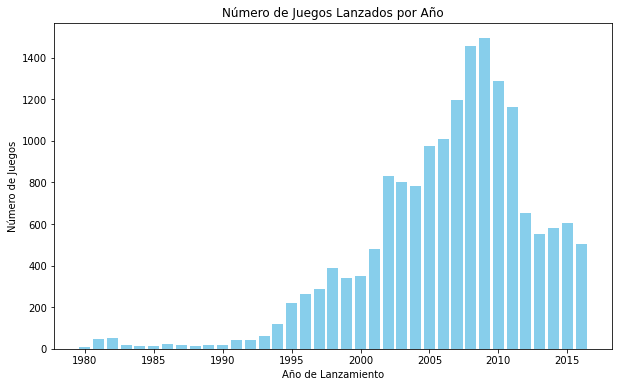

In [235]:
plt.figure(figsize=(10, 6))
plt.bar(juegos_por_año['year_of_release'], juegos_por_año['num_juegos'], color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.show()

We can conclude that the highest number of games sold was between 2005 and 2012, but in general video games have had an explosion in sales since the beginning of 1995.

### 5.2 Analysis of sales by platform and years <a id='analysis2'></a>

Next, we will proceed to observe how sales vary from one platform to another by selecting the platforms with the highest total sales. Additionally, we will analyse the sales behaviour of platforms that used to be popular but now have no sales.

In [236]:
# Calculating the total sales of the games by platform
ventas_por_plataforma = games.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index(name='total_sales')
ventas_por_plataforma.head(7)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85


We proceed to select the top 5 platforms with the highest sales (over 700 million) to conduct a more thorough analysis of their annual sales.

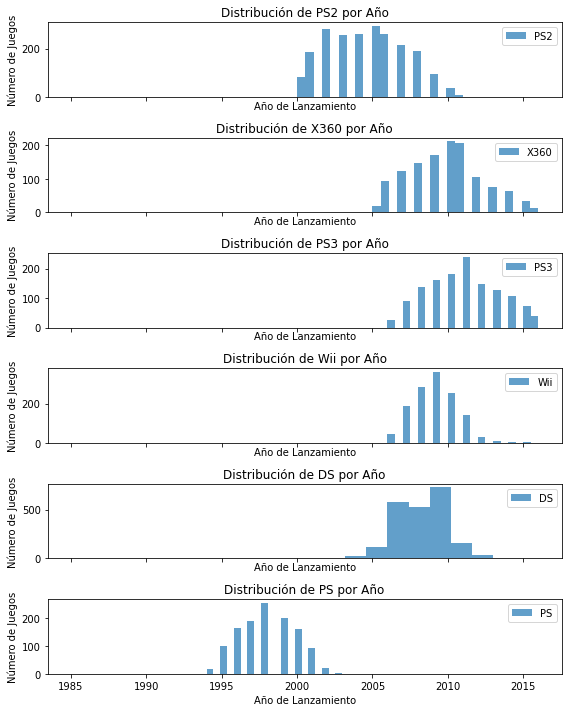

In [237]:
#Filtering the platforms with highest sales
best_sales = ventas_por_plataforma[ventas_por_plataforma['total_sales'] > 700]

#We filter the original DataFrame by top 5 platforms
games_top = games[games['platform'].isin(best_sales['platform'])]

# Get the unique platforms for the colour coding
plataformas_unicas = best_sales['platform'].unique()

# Create sub-charts for each platform
fig, axes = plt.subplots(nrows=len(plataformas_unicas), figsize=(8, 10), sharex=True)

for i, plataforma in enumerate(plataformas_unicas):
    datos_plataforma = games_top[games_top['platform'] == plataforma]
    axes[i].hist(datos_plataforma['year_of_release'], bins=20, alpha=0.7, label=plataforma)
    axes[i].set_title(f'Distribución de {plataforma} por Año')
    axes[i].set_xlabel('Year of Release')
    axes[i].set_ylabel('Number of Games')
    axes[i].legend()

plt.tight_layout()
plt.show()

We can conclude that, at least, the most successful platforms in sales have a normal distribution throughout their useful life, where in the first 5 years their popularity grows until it reaches a peak in sales and then another approximately 5 years until they leave the market and their popularity declines. We also observe that a new generation appears when the previous one is leaving the market, as happened with the PS1, PS2, and PS3.

### 5.3 Analysis of platform sales leaders <a id='analysis3'></a>

We will then proceed to analyse the leading sales platforms and see which ones are growing and disappearing.

To create a model for the next year (2017) it will be necessary to create a Dataframe that encompasses the most representative data that can explain the sales, popularity, platforms, etc. of the last time. In that sense and as seen above, only data from 2005 to 2016 will be considered as it shows the life span of video games in the last 20 years.

In [238]:
# Creating dataframes with data between 2005 and 2016
data_2017 = games.query('2005 <= year_of_release <= 2016')
data_2017.info() #Checking the new datafram

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 11467 entries, 0 to 16714
,Data columns (total 14 columns):
, #   Column            Non-Null Count  Dtype  
,---  ------            --------------  -----  
, 0   name              11467 non-null  object 
, 1   platform          11467 non-null  object 
, 2   year_of_release   11467 non-null  float64
, 3   genre             11467 non-null  object 
, 4   na_sales          11467 non-null  float64
, 5   eu_sales          11467 non-null  float64
, 6   jp_sales          11467 non-null  float64
, 7   other_sales       11467 non-null  float64
, 8   critic_score      11467 non-null  float64
, 9   user_score        11467 non-null  float64
, 10  rating            11467 non-null  object 
, 11  total_sales       11467 non-null  float64
, 12  cat_user_score    11467 non-null  object 
, 13  cat_critic_score  11467 non-null  object 
,dtypes: float64(8), object(6)
,memory usage: 1.3+ MB


In [239]:
# Leading sales platforms between 2005 and 2016
lider_ventas = data_2017.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index(name='total_sales')
lider_ventas.head(5)

,platform,total_sales
0,X360,971.42
1,PS3,939.65
2,Wii,907.51
3,DS,788.83
4,PS2,448.67


To effectively see which ones grow and which ones decrease over those 10 years, it will be better to separate them into groups of 5 years to observe how they behave in their first and last 5 years.

In [240]:
#  Create dataframe with data between 2005 and 2010
data_2010 = games.query('2005 <= year_of_release <= 2010')
# Leading sales platforms between 2005 and 2010
lider_ventas_2010 = data_2010.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index(name='total_sales')
lider_ventas_2010.head(5)

,platform,total_sales
0,Wii,812.49
1,DS,750.10
2,X360,591.04
3,PS3,485.77
4,PS2,448.22


In [241]:
# Create dataframe with data between 2011 y 2016
data_2016 = games.query('2011 <= year_of_release <= 2016')
# Leading sales platforms between 2011 y 2016
lider_ventas_2016 = data_2016.groupby('platform')['total_sales'].sum().sort_values(ascending = False).reset_index(name='total_sales')
lider_ventas_2016.head(5)

,platform,total_sales
0,PS3,453.88
1,X360,380.38
2,PS4,314.14
3,3DS,259.00
4,XOne,159.32


Given the 3 tables above we can see that for the top 5 best selling platforms globally, i.e. between 2005 and 2016 the best selling platforms were: x360, PS4 and Wii respectively, but we see that during the first 5 years, the most popular were Wii, DS and x360, and then between 2011 and 2016 the popularity of these decreased, among them the Wii and DS platform left the top 5 in sales, only the X360 remained within the top. Therefore, we can say that the X360 was the one that remained the most popular in the last 10 years. We see that the PS4 appears as one of the overall sales leaders, but it only appeared within the last 5 years (2011-2016).

In short, the potentially profitable platforms for 2017 may be PS4 and 3DS mainly because they are new consoles that are still evolving in sales, while the PS3 and X360 while they have had the highest sales over the 10 years, there is a possibility that in the next 5 years these will disappear from the market, although for 2017 we would expect to continue to count on their popularity.

### 5.4 Analysis of global game sales by platform <a id='analysis4'></a>

Next, we will proceed to analyse the global sales of all the games using box plots, broken down by platform, and we will check if the differences in sales are significant.

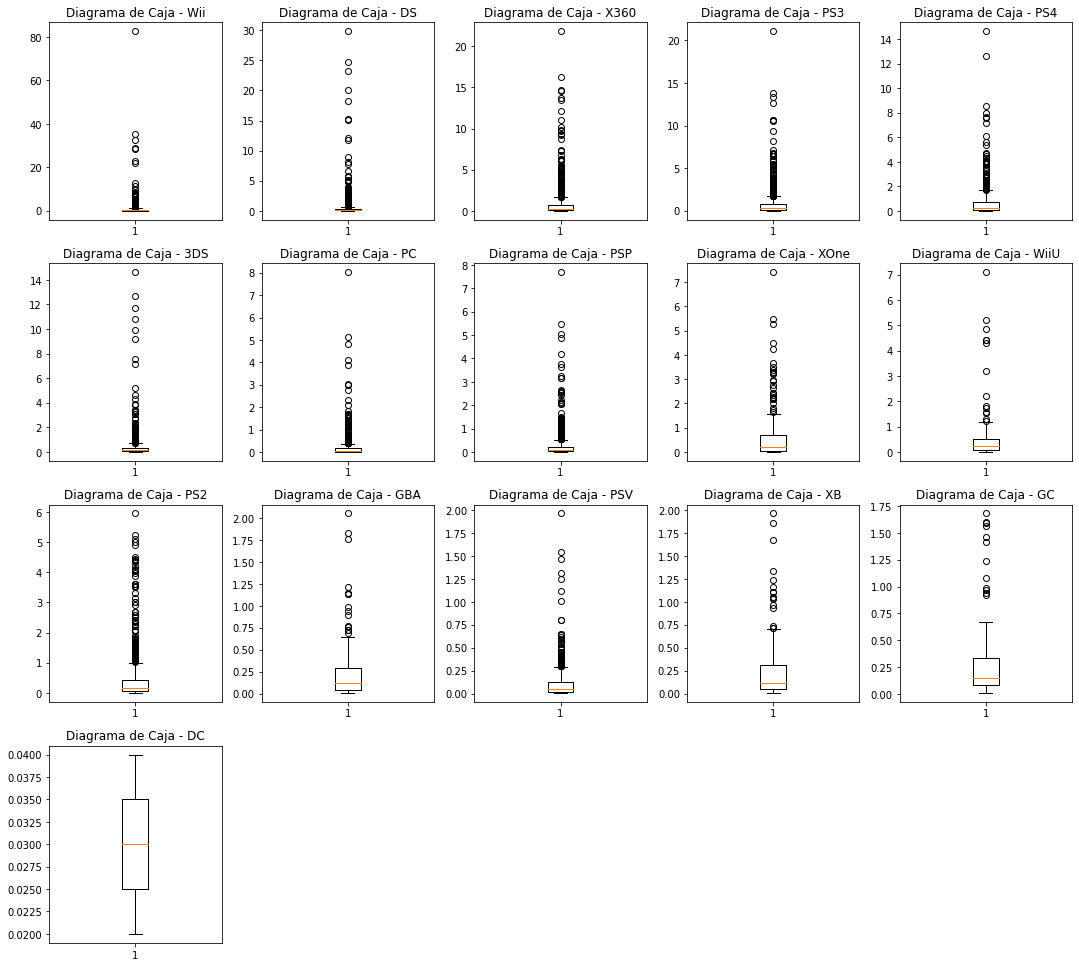

In [242]:
plt.figure(figsize=(15, 20))

# Obtaining the unique platform list
plataformas_unicas = data_2017['platform'].unique()

# We create subplots
for i, plataforma in enumerate(plataformas_unicas, 1):
    plt.subplot(6, 5, i)  # 3 rows, 2 columns, i-th subplot
    plt.boxplot(data_2017[data_2017['platform'] == plataforma]['total_sales'])
    plt.title(f'Boxplot - {plataforma}')

plt.tight_layout()
plt.show()

In [243]:
# Leading sales platforms between 2005 y 2016
ventas_prom = data_2017.groupby('platform')['total_sales'].mean().sort_values(ascending = False).reset_index(name='total_sales')
ventas_prom

,platform,total_sales
0,PS4,0.801378
1,X360,0.769746
2,PS3,0.705973
3,Wii,0.687508
4,XOne,0.645020
5,WiiU,0.559116
6,3DS,0.498077
7,PS2,0.408253
8,DS,0.370865
9,GC,0.277660


From the above boxplot and the table of average sales per platform we can extract that:

- the median of the global sales of the platforms does not exceed the range of 0.25 - 0.5 million usd. 
- All have a similar distribution, except for the older platforms, such as PSV, XB, GC and DC.
- All have atypical data that exceeds the upper limit of 1 million usd.
- The platforms with the highest average global sales are: PS4 (0.8 million), X360 (0.76 million) and PS3 (0.7 million).
- The platforms with the lowest average sales are precisely the oldest platforms of the generation.
- All this data is considering the range of years from 2005 to 2016.

### 5.5 Analysis of reviews versus sales of the Wii platform <a id='analysis5'></a>

Next, we will analyse how user and professional reviews affect the sales of a popular platform, in this case we will choose the ‘Wii’. We will create a scatter plot to make the differences more graphical and calculate the correlation between reviews and sales (this considering the dataframe for the period between 2005 and 2016).

In [244]:
# Filter the data for the 'Wii' platform to obtain the upper limit and see if it is
# necessary to omit the outliers for this analysis.

data_wii = data_2017[data_2017['platform'] == 'Wii']

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data_wii['total_sales'], 25)
Q3 = np.percentile(data_wii['total_sales'], 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define limits for outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [245]:
limite_superior

1.08625

In [246]:
limite_inferior

-0.52375

In [247]:
# We corroborate the % of outliers that corresponds to the total data
valor_total = data_wii['total_sales'].value_counts().sum() 
filtro = data_wii['total_sales'] > limite_superior
porcentaje = (filtro.sum()/valor_total)*100

print(f"Porcentaje: {porcentaje:.2f}%") 

Porcentaje: 10.53%


In [248]:
valor_total #Number of data in the dataframe 'data_wii'

1320

We see that the sample is relatively high and the percentage of outliers is high (>10%). We will filter these values and compare whether the resulting data had large changes in their mean and standard deviation.

In [249]:
# Store the data without outliers in a separate DataFrame for 'total_sales'
sales_wii = data_wii.query('0 <= total_sales <= @limite_superior')
sales_wii['total_sales'].describe() #we check the created DataFrame

count    1181.000000
mean        0.253514
std         0.247634
min         0.010000
25%         0.080000
50%         0.160000
75%         0.360000
max         1.070000
Name: total_sales, dtype: float64

In [250]:
data_wii['total_sales'].describe() 

count    1320.000000
mean        0.687508
std         3.126609
min         0.010000
25%         0.080000
50%         0.190000
75%         0.482500
max        82.540000
Name: total_sales, dtype: float64

We see that the outliers considerably affect the results of the total sales data, so it will be better to continue with the original dataframe ‘data_wii’.

array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

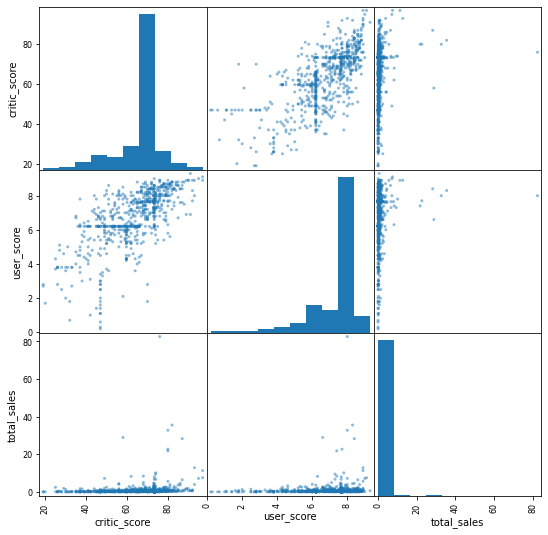

In [251]:
# Analysis of variables that may influence total sales 

variables_num = ['critic_score', 'user_score','total_sales']

# We create a correlation diagram to complement the analysis with numerical values 
pd.plotting.scatter_matrix(data_wii[variables_num], figsize=(9, 9))

In [252]:
#we use a correlation matrix to complement the graphs.
corr_matrix = data_wii[variables_num].corr() 
corr_matrix

,critic_score,user_score,total_sales
critic_score,1.000000,0.732602,0.089870
user_score,0.732602,1.000000,0.054175
total_sales,0.089870,0.054175,1.000000


We can conclude from these scatter plots and the correlation matrix for the ‘Wii’ platform that:

- There is a very similar distribution of ‘critic_score’ and ‘user_score’ data in relation to total sales.
- There is no direct or indirect correlation between user and professional reviews and total sales (indices of 0.05 and 0.08 respectively).
- While there is no correlation between scores and sales, it can be seen that there is an increase in sales (outliers) when scores are higher than 70 for professional reviews and 7 for user reviews.

### 5.6 Analysis of the same games on multiple platforms <a id='analysis6'></a>

Next, we will proceed to compare the sales of the same games on other platforms. For this we will take a sample of games that are on more than one platform, considering the dataframe between 2005 and 2016.

In [253]:
#We create a dataframe to find the games that are on more than one platform
juegos_2 = data_2017[data_2017.duplicated(subset='name', keep=False)]

In [254]:
# Function to compare bar charts
def comparar_graf_barras(dataframes, juegos, descrip, descrip2):
    num_plots = len(dataframes)
    plt.figure(figsize=(3 * num_plots, 5))

    for i, (df, juego) in enumerate(zip(dataframes, juegos), 1):
        plt.subplot(2, 2, i)
        plt.bar(df.index, df, label=juego, alpha=0.7)
        plt.title(descrip)
        plt.xlabel(descrip2)
        plt.legend()

    # Adjust the space between subplots
    plt.tight_layout()
    plt.show()

In [255]:
# We filter by game sample
juegos_seleccionados = ['Grand Theft Auto V', 'Call of Duty: Black Ops II', 'Call of Duty: Modern Warfare 3', 'Just Dance 3']

# We calculated the average total sales per platform for each of the selected games. 
dataframes_seleccionados = [juegos_2[juegos_2['name'] == juego].groupby('platform')['total_sales'].mean() for juego in juegos_seleccionados]

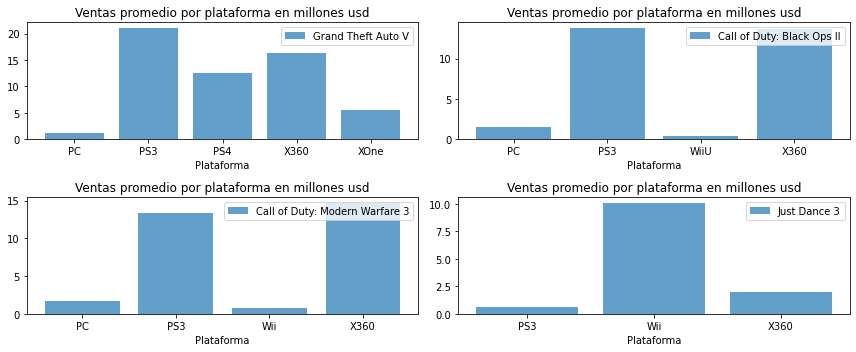

In [281]:
# We compare in the bar charts
comparar_graf_barras(dataframes_seleccionados, juegos_seleccionados, 'Ventas promedio por plataforma en millones usd', 'Plataforma')

We did an analysis of 4 games in terms of their sales with respect to the platforms on which they were released and from this we can conclude that:

- The most successful platforms for mainly non-Nintendo games are: PS3 and X360. For the game ‘Just Dance 3’ there is more sales success on the Wii platform despite the fact that it is a multiplatform game.
- The ‘Call of Duty’ games have very similar sales behaviour on their platforms.
- Only the game ‘Grand Theft Auto V’ has sales success on more than 2 platforms: PS3, PS4, X360 and XOne.
- The game with the highest sales success across platforms is ‘Grand Theft Auto V’ and the game with the lowest sales is ‘Just Dance 3’.

### 5.7 Global sales analysis by gender <a id='analysis7'></a>

We will proceed to analyse the distribution of games by genre and their behaviour in terms of global sales.

In [257]:
# We obtain the total sales of all games by genre
ventas_por_genero = data_2017.groupby('genre')['total_sales'].sum().reset_index(name='venta_juegos').sort_values(by='venta_juegos', ascending=False)
ventas_por_genero

,genre,venta_juegos
0,Action,1221.34
10,Sports,870.41
8,Shooter,764.73
3,Misc,626.85
7,Role-Playing,553.81
6,Racing,359.16
4,Platform,304.03
9,Simulation,271.63
2,Fighting,211.74
1,Adventure,150.17


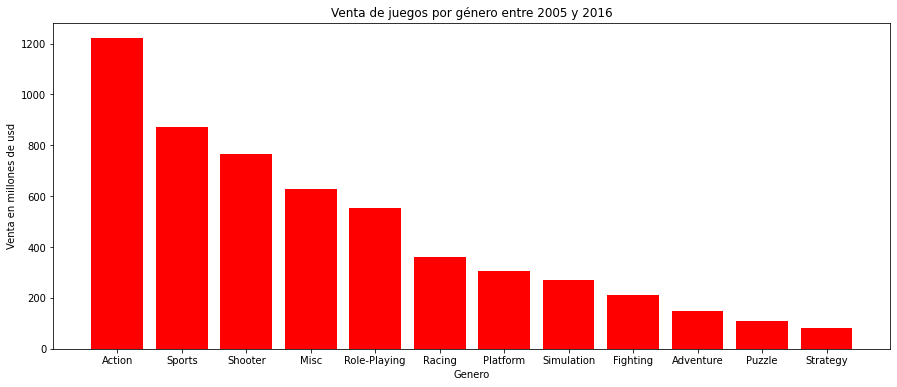

In [258]:
#We graphed the above.
plt.figure(figsize=(15, 6))
plt.bar(ventas_por_genero['genre'], ventas_por_genero['venta_juegos'], color='red')
plt.title('Video Game Sales by genre between 2005 and 2016')
plt.xlabel('Genre')
plt.ylabel('Sales in million of USD')
plt.show()

We can conclude that in the last 10 years, the most predominant games in terms of sales have been: action, sports, and shooting, each surpassing almost 800 million dollars in sales. On the other hand, the least sold were adventure, puzzle, and strategy games. These genres apply to all platforms without distinction.

## 6. Analysis per Region <a id='region'></a>

### 6.1 Analysis of 5 main platforms <a id='region1'></a>

We will analyse the 5 platforms with the largest market shares by comparing their behaviour in different regions.

In [259]:
# Leading sales platforms between 2005 and 2016
lider_ventas = data_2017.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index(name='total_sales')
lider_ventas.head()

,platform,total_sales
0,X360,971.42
1,PS3,939.65
2,Wii,907.51
3,DS,788.83
4,PS2,448.67


In [260]:
#We use the original dataframe, based on those leading platforms, to obtain another dataframe
#with sales by region.

games_top = data_2017[data_2017['platform'].isin(lider_ventas['platform'].head(5))]
games_top['platform'].unique() #verifying the filter

array(['Wii', 'DS', 'X360', 'PS3', 'PS2'], dtype=object)

Text(0.5, 1.0, 'Ventas por región y plataforma')

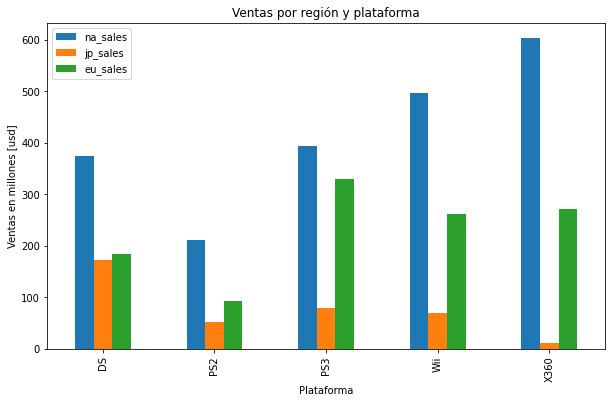

In [261]:
# Group by platform and sum the sales by region
ventas_region_por_plataforma = games_top.groupby('platform')[['na_sales', 'jp_sales', 'eu_sales']].sum()

# Creating the bar chart
ventas_region_por_plataforma.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Plataform')
plt.ylabel('Sales in million [usd]')
plt.title('Sales by region and plataform')


We can observe that sales in Japan were the lowest compared to the other regions for the top 5 platforms, and North America was the region with the most successful sales. 
Additionally, we see that the 'DS' console was the only one that had a more consistent sales performance between Japan and Europe. Finally, we can also say that the 'X360' was not successful in Japan.

### 6.2 Analysis of 5 main genres <a id='region2'></a>

We will do the same previous exercise, but now comparing the 5 main genres.

In [262]:
# Best-selling genres between 2005 and 2016
genero_lider_ventas = data_2017.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index(name='total_sales')
genero_lider_ventas.head()

,genre,total_sales
0,Action,1221.34
1,Sports,870.41
2,Shooter,764.73
3,Misc,626.85
4,Role-Playing,553.81


In [263]:
#We use the original dataframe, based on the leading sales genres, to obtain another dataframe
#with sales by gender

genre_top = data_2017[data_2017['genre'].isin(genero_lider_ventas['genre'].head(5))]
genre_top['genre'].unique() #verifying the filter

array(['Sports', 'Misc', 'Action', 'Role-Playing', 'Shooter'],
      dtype=object)

Text(0.5, 1.0, 'Ventas por región y género')

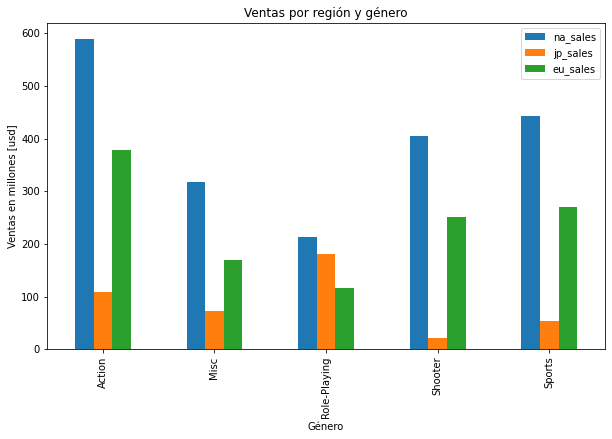

In [282]:
# We group by gender and add up sales by region.
ventas_region_por_genero = genre_top.groupby('genre')[['na_sales', 'jp_sales', 'eu_sales']].sum()

# We create the bar chart
ventas_region_por_genero.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Genre')
plt.ylabel('Sales in millions [usd]')
plt.title('Sales by region and genre')

We can see that Japan is still the region with the lowest sales for all successful genres, except for the ‘Role-Playing’ genre.
Furthermore, the genre ‘Action’ is the best-selling genre in North America and Europe. The genre ‘Role-playing’ has a more symmetrical sales behaviour in these 3 regions than the other genres and we also see that the genres ‘Shooter’ and ‘Sports’ were not very popular in Japan.

### 6.3 Analysis of sales by ESRB ratings <a id='region3'></a>

We will proceed to analyse whether ESRB ratings affect sales in individual regions.

In [265]:
# Total sales by game rating between 2005 and 2016
rating_ventas = data_2017.groupby('rating')['total_sales'].sum().sort_values(ascending=False).reset_index(name='total_sales')
rating_ventas

,rating,total_sales
0,E,1726.62
1,M,1221.78
2,T,961.60
3,unknown,961.34
4,E10+,649.80
5,AO,1.96
6,EC,1.75
7,RP,0.09


Text(0.5, 1.0, 'Ventas por región y clasificación')

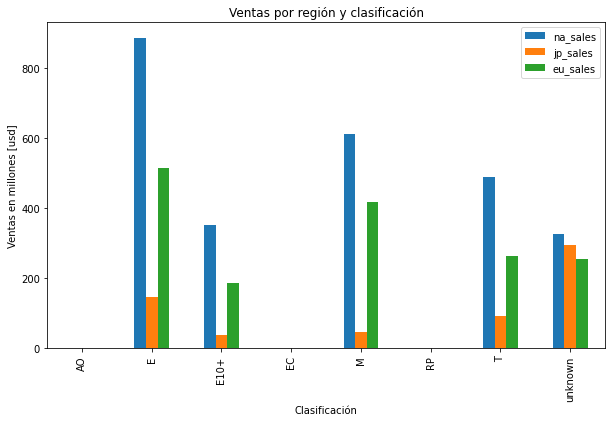

In [266]:
# We group by rating and add up sales by region.
ventas_region_por_rating = data_2017.groupby('rating')[['na_sales', 'jp_sales', 'eu_sales']].sum()

# We create the bar chart
ventas_region_por_rating.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Classification')
plt.ylabel('Sales in millions [usd]')
plt.title('Sales by region and genre')

We see that classification does impact overall sales to a large extent. For example, sales of the AO, EC and RP classification are less than 0.5 million. On the other hand, the ‘E’ classification is the most successful in North America, Europe, but we cannot confirm the same for Japan, since we have a higher amount of those sales in the ‘unknown’ classification. The best selling classifications are ‘M’, ‘T’ and ‘E10+’ and all have a similar distribution, i.e. more sales in North America and less in Japan.

## 7. Testing statistical hypotheses <a id='test'></a>

### 7.1 Analysis of Average User Ratings for Xbox One and PC <a id='test1'></a>

We will verify if the average user ratings for the Xbox One and PC platforms are the same.

Next, we will analyse the behaviour of user rating data for the Xbox One and PC platforms to see if we could use a t-student sample in case of a normal distribution.

In [267]:
# We filter by platforms in analysis
platf_seleccionados = ['XOne', 'PC']

#Obtaining a filtered dataframe
user_score_sample = data_2017[data_2017['platform'].isin(platf_seleccionados)]
user_score_sample['platform'].unique()


array(['PC', 'XOne'], dtype=object)

In [268]:
# Function for comparing histograms
def comparar_histogramas(data1, data2, name1, name2, descrip, descrip2):
    plt.figure(figsize=(18, 5))
    
    # Histogram of the first DataFrame (data1)
    plt.subplot(1, 2, 1)
    plt.hist(data1, bins=10, label=name1, color='blue', alpha=0.7)
    plt.title(f'{descrip}')
    plt.xlabel(f'{descrip2}')
    plt.legend()

    # Histogram of the second DataFrame (data2)
    plt.subplot(1, 2, 2)
    plt.hist(data2, bins=10, label=name2, color='green', alpha=0.7)
    plt.title(f'{descrip}')
    plt.xlabel(f'{descrip2}')
    plt.legend()

In [269]:
XOne_score = user_score_sample[user_score_sample['platform'] == 'XOne']
PC_score = user_score_sample[user_score_sample['platform'] == 'PC']

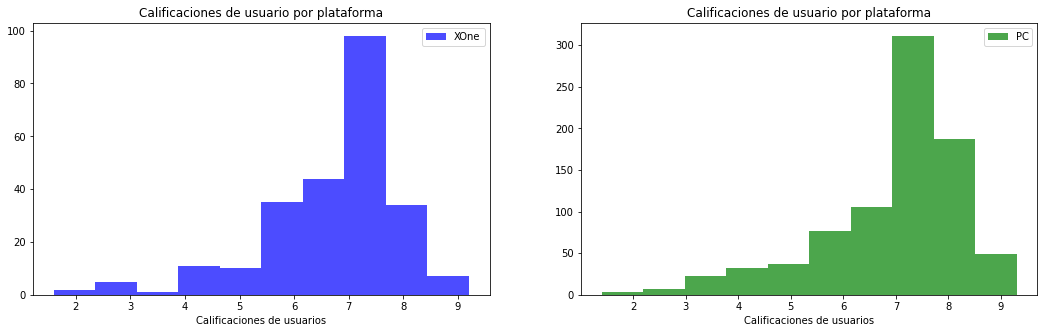

In [270]:
#llamamos a la funcion histogramas
comparar_histogramas(XOne_score['user_score'], PC_score['user_score'], 'XOne' , 'PC' ,'Users rating by platform','Users ratings')

We can observe that they tend to follow a normal distribution; in any case, the sample data is >30 (large sample), so the t-test, which is the one we will use, is less sensitive to deviations from normality.

To test whether the average user ratings for the Xbox one and PC platforms are the same, we can use a hypothesis test. In this case, we can use a t-test for two independent samples, since we are comparing the means of two different groups.

First, we establish our hypotheses:

- Null hypothesis (H0): The mean user ratings for the Xbox One and PC platforms are equal.
- Alternative hypothesis (H1): The average user ratings for the Xbox One and PC platforms are different.

In [275]:
# Testing the hypothesis

# Using the t-test of 2 samples
results = st.ttest_ind(XOne_score['user_score'], PC_score['user_score'])

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha: 
    print("Reject the Null Hypothesis")
else:
    print("Do not reject the Null Hypothesis")

0.01846623883968937
,Rechazamos la hipótesis nula


**CONCLUSION**:
Since the p-value is less than the alpha value of significance (0.05), the result will be to reject the null hypothesis, i.e. we can statistically conclude that the average user ratings on Xbox One are different than that on PC.

### 7.2 Analysis of Average User Ratings for Action and Sports <a id='region2'></a>

We will proceed to verify if the average ratings of users for the Action and Sports genres are different.

Next, we will analyse the behaviour of user rating data in the action and sports genres to see if we could use a t-student sample in case of a normal distribution.

In [276]:
# Filtering by platforms in the analysis
gen_seleccionados = ['Action', 'Sports']

#Dataframe filtered
user_score_sample2 = data_2017[data_2017['genre'].isin(gen_seleccionados)]
user_score_sample2['genre'].unique()#Checking the filter


array(['Sports', 'Action'], dtype=object)

In [278]:
#We create filters for each genre in analysis
Action_score = user_score_sample2[user_score_sample2['genre'] == 'Action']
Sports_score = user_score_sample2[user_score_sample2['genre'] == 'Sports']

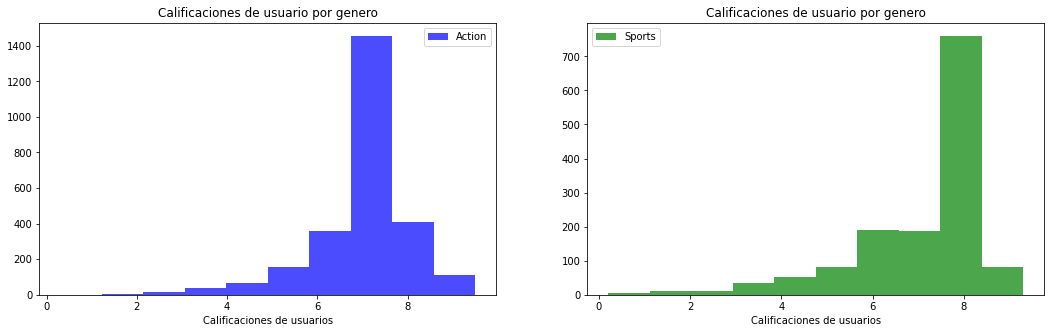

In [279]:
#we call the histogram function to see the behaviour of the normal distribution 
comparar_histogramas(Action_score['user_score'], Sports_score['user_score'], 'Action' , 'Sports' ,'User ratings by genre','User Ratings')

We can observe that they tend to follow a normal distribution; in any case, the sample data is >30 (large sample), so the t-test, which is the one we will use, is less sensitive to deviations from normality.

To test whether the average ratings of the ‘Sports’ and ‘Action’ genres are equal, a hypothesis test can be employed. In this case, a two-sample t-test for independent samples is appropriate, as it compares the means of two different groups.

First, the hypotheses are established:

- Null Hypothesis (H0): The average user ratings for the Action and Sports genres are equal.

- Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are different.

In [280]:
# Testing the hypothesis

# Using the t-test of 2 samples
results = st.ttest_ind(Action_score['user_score'], Sports_score['user_score'])

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha: 
    print("Reject the Null Hypothesis")
else:
    print("Do not reject the Null Hypothesis")

1.7567486833524652e-07
,Rechazamos la hipótesis nula


**CONCLUSION**:

Since the p-value is less than the alpha value of significance (0.05), the result will be to reject the null hypothesis, i.e. we can statistically conclude that the average user ratings for the gender Action are different than for the gender Sports.

## Project Conclusion <a id='end'></a>

As a general conclusion, the following steps can be highlighted in the order in which they were addressed:

- Step 1: The database was verified in its entirety.

- Step 2: Anomalies in each variable were analyzed and corrected (whether due to text standardization issues, outlier data, or data that did not make sense given the nature of the variable). Columns with missing values were also identified, and duplicate data were checked.

- Step 3: The identified issues from Step 2 were corrected.

- Step 4: It was analyzed whether there was any explanation for the absence of certain values in each variable. Missing values were then filled based on the main variables that had a correlation (for quantitative data), and categorical value categorization was used for categorical data.

- Step 5: The data were analyzed based on:

    - Analysis of games released by year

    - Analysis of sales by platform and year

    - Analysis of top-selling platforms

    - Analysis of user reviews versus Wii platform sales

    - Analysis of multi-platform game sales

    - Analysis of sales by genre

    In general, the following conclusions can be drawn from these analyses:
    
    - For the first analysis, it was concluded that the largest number of games sold was between 2005 and 2012, but overall, video games have experienced an explosion in sales since 1995.
    
    - For the second analysis, it was concluded that in the first five years, the popularity of platforms grows until reaching a peak in sales, followed by approximately another five years before declining in popularity.
    
    - For the third analysis, it was concluded that the most potentially profitable platforms for 2017 could be the PS4 and 3DS, mainly because they are new consoles still evolving in sales. In contrast, while the PS3 and X360 have had the highest sales over the past ten years, there is a possibility that they will disappear from the market in the next five years, although they are expected to remain popular in 2017.
    
    - For the fourth analysis, all platforms showed a similar distribution, except for the older platforms. All platforms exhibited outlier sales exceeding one million USD.
    
    - For the fifth analysis, no direct or indirect correlation was observed between user and professional reviews and total sales.
    
    - For the sixth analysis, the most successful platforms for games not primarily from Nintendo are the PS3 and X360. For the game 'Just Dance 3', sales were more successful on the Wii platform despite being a multi-platform game, while 'Call of Duty' games showed very similar sales behavior across platforms.
    
    - In the last analysis of this section, it was found that in the last ten years, the most predominant genres in sales were: action, sports, and shooting, each exceeding almost 800 million dollars in sales. On the other hand, the least sold were adventure, puzzle, and strategy games.

- Step 6: An analysis was conducted based on sales by region: North America, Japan, and Europe. It was concluded that, in general, sales in Japan were lower than in the other regions, with the highest sales in North America across platforms and main genres. The same trend was observed for ESRB ratings, with a few exceptions.

- Step 7: Finally, statistical analysis tests were conducted for two samples, with the following conclusions:

    - The average user ratings for Xbox One are different from those for PC.

    - The average user ratings for the Action genre are different from those for the Sports genre.

In both cases, the null hypothesis was rejected.

Note: This is under the assumption that the data tend to follow a normal distribution and that the samples include more than 30 data points.